In [1]:
import pandas as pd
import numpy as np


In [2]:
train =pd.read_excel("C:/Users/Dell/Downloads/datascience/food_delivery/Participants Data/Data_Train.xlsx")
test =pd.read_excel("C:/Users/Dell/Downloads/datascience/food_delivery/Participants Data/Data_Test.xlsx")



In [3]:
data=train.append(test,sort=False,ignore_index=True)

In [4]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [5]:
data.isnull().sum()

Restaurant          0
Location            0
Cuisines            0
Average_Cost        0
Minimum_Order       0
Rating              0
Votes               0
Reviews             0
Delivery_Time    2774
dtype: int64

In [6]:
data.nunique()

Restaurant       8661
Location           35
Cuisines         2392
Average_Cost       26
Minimum_Order      20
Rating             33
Votes            1181
Reviews           811
Delivery_Time       7
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     13868 non-null  object
 1   Location       13868 non-null  object
 2   Cuisines       13868 non-null  object
 3   Average_Cost   13868 non-null  object
 4   Minimum_Order  13868 non-null  object
 5   Rating         13868 non-null  object
 6   Votes          13868 non-null  object
 7   Reviews        13868 non-null  object
 8   Delivery_Time  11094 non-null  object
dtypes: object(9)
memory usage: 975.2+ KB


In [8]:
data['Delivery_Time'].value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

In [9]:
data['Cuisines']=data['Cuisines'].str.lower()

In [10]:
data['Cuisines']=data['Cuisines'].str.replace(' ','')


In [11]:
data['Cuisines']

0                 fastfood,rolls,burger,salad,wraps
1                                 icecream,desserts
2                       italian,streetfood,fastfood
3                       mughlai,northindian,chinese
4                                    cafe,beverages
                            ...                    
13863                              fastfood,chinese
13864    continental,northindian,desserts,beverages
13865                            andhra,southindian
13866                                        bakery
13867                   italian,streetfood,fastfood
Name: Cuisines, Length: 13868, dtype: object

In [12]:
Cuisines_list=data['Cuisines'].str.split(',')

In [13]:
Cuisines_list

0                [fastfood, rolls, burger, salad, wraps]
1                                   [icecream, desserts]
2                        [italian, streetfood, fastfood]
3                        [mughlai, northindian, chinese]
4                                      [cafe, beverages]
                              ...                       
13863                                [fastfood, chinese]
13864    [continental, northindian, desserts, beverages]
13865                              [andhra, southindian]
13866                                           [bakery]
13867                    [italian, streetfood, fastfood]
Name: Cuisines, Length: 13868, dtype: object

In [14]:
from collections import Counter
Cuisines_counter=Counter(([a for b in Cuisines_list.tolist() for a in b]))

In [15]:
Cuisines_counter

Counter({'fastfood': 3862,
         'rolls': 620,
         'burger': 414,
         'salad': 284,
         'wraps': 97,
         'icecream': 480,
         'desserts': 1548,
         'italian': 751,
         'streetfood': 935,
         'mughlai': 1098,
         'northindian': 5999,
         'chinese': 4339,
         'cafe': 592,
         'beverages': 1789,
         'southindian': 1507,
         'thai': 205,
         'asian': 259,
         'mithai': 386,
         'momos': 397,
         'indonesian': 3,
         'biryani': 1161,
         'kerala': 73,
         'bihari': 14,
         'mexican': 143,
         'japanese': 72,
         'bakery': 864,
         'burmese': 13,
         'bubbletea': 6,
         'tea': 87,
         'pizza': 611,
         'lucknowi': 15,
         'mangalorean': 27,
         'european': 89,
         'continental': 694,
         'sandwich': 339,
         'healthyfood': 352,
         'bengali': 132,
         'american': 163,
         'mishti': 82,
         'hyderabadi'

In [16]:
data['Cuisines'] = data['Cuisines'].str.replace('rolls','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('burger','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('wraps','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('streetfood','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('momos','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('sandwich','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('fingerfood','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('barfood','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('rawmeats','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('hotdogs','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('cafe','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('pizza','fastfood')

data['Cuisines'] = data['Cuisines'].str.replace('icecream','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('mithai','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('bakery','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('bubbletea','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('mishti','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('paan','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('frozenyogurt','desserts')

data['Cuisines'] = data['Cuisines'].str.replace('italian','european')
data['Cuisines'] = data['Cuisines'].str.replace('german','european')
data['Cuisines'] = data['Cuisines'].str.replace('spanish','european')
data['Cuisines'] = data['Cuisines'].str.replace('steak','european')
data['Cuisines'] = data['Cuisines'].str.replace('mediterranean','european')
data['Cuisines'] = data['Cuisines'].str.replace('brazilian','european')
data['Cuisines'] = data['Cuisines'].str.replace('belgian','european')
data['Cuisines'] = data['Cuisines'].str.replace('french','european')
data['Cuisines'] = data['Cuisines'].str.replace('portuguese','european')
data['Cuisines'] = data['Cuisines'].str.replace('african','european')
data['Cuisines'] = data['Cuisines'].str.replace('greek','european')

data['Cuisines'] = data['Cuisines'].str.replace('mexican','american')
data['Cuisines'] = data['Cuisines'].str.replace('bbq','american')
data['Cuisines'] = data['Cuisines'].str.replace('roastchicken','american')
data['Cuisines'] = data['Cuisines'].str.replace('charcoalchicken','american')
data['Cuisines'] = data['Cuisines'].str.replace('tex-mex','american')
data['Cuisines'] = data['Cuisines'].str.replace('southamerican','american')

data['Cuisines'] = data['Cuisines'].str.replace('arabian','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('kebab','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('lebanese','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('afghan','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('iranian','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('middleeastern','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('turkish','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('israeli','middleeast')

data['Cuisines'] = data['Cuisines'].str.replace('chinese','chinese')

data['Cuisines'] = data['Cuisines'].str.replace('kerala','regional')
data['Cuisines'] = data['Cuisines'].str.replace('bihari','regional')
data['Cuisines'] = data['Cuisines'].str.replace('Lucknowi','regional')
data['Cuisines'] = data['Cuisines'].str.replace('mangalorean','regional')
data['Cuisines'] = data['Cuisines'].str.replace('bengali','regional')
data['Cuisines'] = data['Cuisines'].str.replace('andhra','regional')
data['Cuisines'] = data['Cuisines'].str.replace('assamese','regional')
data['Cuisines'] = data['Cuisines'].str.replace('maharashtrian','regional')
data['Cuisines'] = data['Cuisines'].str.replace('chettinad','regional')
data['Cuisines'] = data['Cuisines'].str.replace('parsi','regional')
data['Cuisines'] = data['Cuisines'].str.replace('odia','regional')
data['Cuisines'] = data['Cuisines'].str.replace('tamil','regional')
data['Cuisines'] = data['Cuisines'].str.replace('northeastern','regional')
data['Cuisines'] = data['Cuisines'].str.replace('bohri','regional')
data['Cuisines'] = data['Cuisines'].str.replace('goan','regional')
data['Cuisines'] = data['Cuisines'].str.replace('gujarati','regional')
data['Cuisines'] = data['Cuisines'].str.replace('rajasthani','regional')
data['Cuisines'] = data['Cuisines'].str.replace('naga','regional')
data['Cuisines'] = data['Cuisines'].str.replace('awadhi','regional')
data['Cuisines'] = data['Cuisines'].str.replace('kashmiri','regional')
data['Cuisines'] = data['Cuisines'].str.replace('malwani','regional')

data['Cuisines'] = data['Cuisines'].str.replace('thai','seafood')
data['Cuisines'] = data['Cuisines'].str.replace('konkan','seafood')
data['Cuisines'] = data['Cuisines'].str.replace('srilankan','seafood')
data['Cuisines'] = data['Cuisines'].str.replace('poké','seafood')

#data['Cuisines'] = data['Cuisines'].str.replace('thai','asian')
data['Cuisines'] = data['Cuisines'].str.replace('indonesian','asian')
data['Cuisines'] = data['Cuisines'].str.replace('japanese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('burmese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('sushi','asian')
data['Cuisines'] = data['Cuisines'].str.replace('cantonese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('tibetan','asian')
data['Cuisines'] = data['Cuisines'].str.replace('malaysian','asian')
data['Cuisines'] = data['Cuisines'].str.replace('vietnamese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('korean','asian')
data['Cuisines'] = data['Cuisines'].str.replace('bangladeshi','asian')
data['Cuisines'] = data['Cuisines'].str.replace('nepalese','asian')


data['Cuisines'] = data['Cuisines'].str.replace('tea','beverages')
data['Cuisines'] = data['Cuisines'].str.replace('juices','beverages')
data['Cuisines'] = data['Cuisines'].str.replace('coffee','beverages')

data['Cuisines'] = data['Cuisines'].str.replace('hyderabadi','biryani')
data['Cuisines'] = data['Cuisines'].str.replace('lucknowi','biryani')

data['Cuisines'] = data['Cuisines'].str.replace('indian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('modernindian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('modernnorthindian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('northindian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('northnorthindian','northindian')


data['Cuisines'] = data['Cuisines'].str.replace('southnorthindian','southindian')

data['Cuisines'] = data['Cuisines'].str.replace('salad','healthyfood')

In [17]:
data['Cuisines']

0        fastfood,fastfood,fastfood,healthyfood,fastfood
1                                      desserts,desserts
2                             european,fastfood,fastfood
3                            mughlai,northindian,chinese
4                                     fastfood,beverages
                              ...                       
13863                                   fastfood,chinese
13864         continental,northindian,desserts,beverages
13865                               regional,southindian
13866                                           desserts
13867                         european,fastfood,fastfood
Name: Cuisines, Length: 13868, dtype: object

In [18]:
data['Cuisines'] = data['Cuisines'].str.lower()
data['Cuisines'] = data['Cuisines'].str.replace(' ','')
Cuisines_list = data['Cuisines'].str.split(',')
from collections import Counter
Cuisines_counter = Counter(([a for b in Cuisines_list.tolist() for a in b]))
Cuisines_counter

Counter({'fastfood': 7979,
         'healthyfood': 636,
         'desserts': 3405,
         'european': 932,
         'mughlai': 1098,
         'northindian': 6028,
         'chinese': 4339,
         'beverages': 2127,
         'southindian': 1507,
         'seafood': 468,
         'asian': 508,
         'biryani': 1261,
         'regional': 691,
         'american': 382,
         'continental': 694,
         'middleeast': 467})

In [19]:
data['Delivery_Time']=data['Delivery_Time'].str.replace('minutes','')
data['Delivery_Time']=pd.to_numeric(data['Delivery_Time'])

In [20]:

data['City']=data.Location.str.rpartition(',')[2]
data['Locality']=data.Location.str.rpartition(',')[0]

In [21]:
data.City[data.City.str.contains('Delhi University-GTB Nagar')]='Delhi'
data.City[data.City.str.contains('Mumbai CST Area')]='Mumbai'
data.City[data.City.str.contains('Mumbai Central')]='Mumbai'
data.City[data.City.str.contains('India Gate')]='Delhi'
data.City[data.City.str.contains('Delhi Cantt.')]='Delhi'
data.City[data.City.str.contains('Maharashtra')]='Pune'
data.City[data.City.str.contains('Pune University')]='Pune'
data.City[data.City.str.contains('Gurgoan')]='Gurgaon'
data.City[data.City.str.contains('Electronic City')]='Bangalore'

# data.City[data.City.str.contains('Whitefield')]='Bangalore'
# data.City[data.City.str.contains('Marathalli')]='Bangalore'

data['City'] = data['City'].str.strip()
data['City'] = data['City'].str.lower()
del data['Location']

C:\Users\Dell\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dell\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thi

In [22]:
data1=data.copy()

In [23]:
data['Average_Cost']=data['Average_Cost'].str.replace("[^0-9]","")
data['Average_Cost']=data['Average_Cost'].str.strip()
data['Average_Cost']=pd.to_numeric(data['Average_Cost'])
data['Minimum_Order'] = data['Minimum_Order'].str.replace("[^0-9]","")
data['Minimum_Order'] = data['Minimum_Order'].str.strip()
data['Minimum_Order']=pd.to_numeric(data['Minimum_Order'])

In [24]:
data.Rating=data.Rating.replace("NEW",np.nan)
data.Rating=data.Rating.replace("-",np.nan)
data.Rating=data.Rating.replace("Opening Soon",np.nan)
data.Rating=data.Rating.replace("Temporarily Closed",np.nan)
data.Rating=data.Rating.astype('float')

In [25]:
data.Votes = data.Votes.replace("-",np.nan)
data.Votes = data.Votes.astype('float')
data.Reviews = data.Reviews.replace("-",np.nan)
data.Reviews = data.Reviews.astype('float')

In [26]:
data.shape

(13868, 10)

In [27]:
data['total_div_of_reviews'] = data['Votes']/data['Reviews']
data['total_sum_of_reviews'] = data['Votes']*data['Reviews']

data['total_div_of_ratings'] = data['Votes']/data['Rating']
data['total_sum_of_ratings'] = data['Votes']*data['Rating']

data['total_div_of_Minimum_Order'] = data['Votes']/data['Minimum_Order']
data['total_sum_of_Minimum_Order'] = data['Votes']*data['Minimum_Order']

data['total_div_of_Average_Cost'] = data['Votes']/data['Average_Cost']
data['total_sum_of_Average_Cost'] = data['Votes']*data['Average_Cost']

data['total_div_of_ratings_Reviews'] = data['Rating']/data['Reviews']
data['total_sum_of_ratings_1'] = data['Rating']*data['Reviews']

data['total_div_of_Minimum_Order_1'] = data['Rating']/data['Minimum_Order']
data['total_sum_of_Minimum_Order_1'] = data['Rating']*data['Minimum_Order']

data['total_div_of_Average_Cost_1'] = data['Rating']/data['Average_Cost']
data['total_sum_of_Average_Cost_1'] = data['Rating']*data['Average_Cost']

data['total_div_of_reviews_Minimum_Order_1'] = data['Reviews']/data['Minimum_Order']
data['total_sum_of_reviews_Minimum_Order_1'] = data['Reviews']*data['Minimum_Order']

data['total_div_of_reviews_Average_Cost_1'] = data['Reviews']/data['Average_Cost']
data['total_sum_of_reviews_Average_Cost_1'] = data['Reviews']*data['Average_Cost']

data['total_div_of_Minimum_Order_Average_Cost_1'] = data['Average_Cost']/data['Minimum_Order']
data['total_sum_of_Minimum_Order_Average_Cost_1'] = data['Average_Cost']*data['Minimum_Order']

In [28]:
data1.shape

(13868, 10)

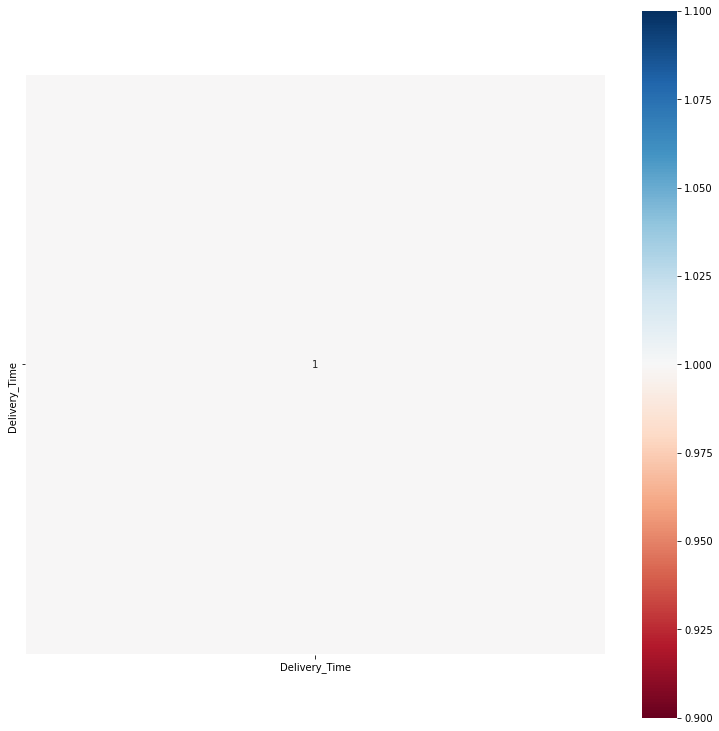

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
colormap=plt.cm.RdBu
plt.figure(figsize=(13,13))
sns.heatmap(data1.corr(),linewidths=0.1,square=True,cmap=colormap,linecolor='white',annot=True)

In [30]:
train_x=data1[~data1['Delivery_Time'].isnull()]
train_y=train_x['Delivery_Time']
test_x=data1[data1['Delivery_Time'].isnull()]

del train_x['Delivery_Time']
del test_x['Delivery_Time']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 18121995, stratify=train_y)

In [32]:
categorical_features_indices=np.where(X_train.dtypes =='object')[0]

In [33]:
categorical_features_indices

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [34]:
import catboost
def make_classifier():
    model = catboost.CatBoostClassifier(
        iterations=30000,
        random_state=18121995,
        learning_rate=0.01,
        loss_function='MultiClass',
        early_stopping_rounds=200,
    )
    return model

In [35]:
import os, sys, datetime
from time import time
import catboost
from sklearn.model_selection import StratifiedKFold

In [37]:
start_time=time()
NFOLDS = 4
folds = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=18121995)
models=[]
scores=[]
for fold,(train_ids,test_ids) in enumerate(folds.split(train_x,train_y)):
    print('Fold:',fold+1)
    model=make_classifier()
    model.fit(train_x.loc[train_ids], train_y.loc[train_ids], 
              eval_set=(train_x.loc[test_ids], train_y.loc[test_ids]),
              use_best_model=False,
              verbose=500,
              cat_features=categorical_features_indices)    
    
    print('\n')
    
print('finished in {}'.format( 
    str(datetime.timedelta(seconds=time() - start_time))))

Fold: 1
0:	learn: 1.9176248	test: 1.9173789	best: 1.9173789 (0)	total: 147ms	remaining: 1h 13m 37s
500:	learn: 0.5984995	test: 0.5300972	best: 0.5300972 (500)	total: 3m 7s	remaining: 3h 4m 16s
1000:	learn: 0.5601128	test: 0.5102609	best: 0.5102609 (1000)	total: 7m 9s	remaining: 3h 27m 14s
1500:	learn: 0.5327042	test: 0.5023658	best: 0.5023605 (1496)	total: 11m 7s	remaining: 3h 31m 19s
2000:	learn: 0.5101975	test: 0.4987717	best: 0.4987632 (1998)	total: 15m 9s	remaining: 3h 32m 11s
2500:	learn: 0.4909334	test: 0.4968038	best: 0.4968038 (2500)	total: 19m 15s	remaining: 3h 31m 49s
3000:	learn: 0.4723624	test: 0.4952326	best: 0.4951914 (2980)	total: 23m 23s	remaining: 3h 30m 29s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.4946072567
bestIteration = 3226



Fold: 2
0:	learn: 1.9177433	test: 1.9173239	best: 1.9173239 (0)	total: 153ms	remaining: 1h 16m 37s
500:	learn: 0.6044606	test: 0.5006136	best: 0.5006136 (500)	total: 3m 23s	remaining: 3h 19m 54s
1000:	learn: 0.56

In [38]:
from scipy import stats
predictions=[]
for model in models:
    predictions.append(model.predict(train_x).astype(int))
predictions=np.concatenate(predictions,axis=1)
df=pd.DataFrame(predictions)
vote=stats.mode(predictions,axis=1)[0].reshape[-1]
df['vote']=vote
df['y']=train_y
df

ValueError: need at least one array to concatenate

In [ ]:
predictions = []
for model in models:
    predictions.append(model.predict(test_x))
predictions = np.concatenate(predictions, axis=1)
# Voting
predictions = stats.mode(predictions, axis=1)[0].reshape(-1)
print(predictions.shape)

In [ ]:
a=pd.DataFrame()
# predcb=predcb.astype(int)
# predcb=predcb.flatten()
a['Delivery_Time']=np.round(predictions).astype('int')
a['Delivery_Time'] = a['Delivery_Time'].replace({30:'30 minutes', 45:'45 minutes', 65:'65 minutes', 120:'120 minutes', 20:'20 minutes', 80:'80 minutes', 10:'10 minutes'})
a.to_excel('cb_all_cat_1.0.xlsx', index=False)

In [ ]:
import matplotlib.pyplot as plt
feat_importances=pd.Series(model.feature_importances_,index=train_x.columns)
feat_importances.nsmallest(1000).plot(kind='barh')
plt.show()
